# Introduction
This is a project notebook to predict the scores of students using a few features about the school. 

Data source: https://www.kaggle.com/kwadwoofosu/predict-test-scores-of-students

### Modelling setup

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# import encoder
from sklearn.preprocessing import LabelEncoder

# import joblib
from joblib import dump, load#Serialiser
#To compress models, difficult with pickles
# import sklearn library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# read CSV as DataFrame
df = pd.read_csv("test_scores.csv")
df

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0


In [3]:
# get DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [4]:
# get the summary and description for all columns
df.describe(include='all')#Without include you get only numbers

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
count,2133,2133,2133,2133,2133,2133.000000,2133,2133,2133,2133.000000,2133.000000
unique,23,3,2,97,2,NaN,2133,2,2,NaN,NaN
top,GOOBU,Urban,Public,18K,Standard,NaN,BZZOL,Male,Does not qualify,NaN,NaN
freq,158,906,1582,31,1373,NaN,1,1077,1215,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,22.796531,NaN,NaN,NaN,54.955931,67.102203
std,NaN,NaN,NaN,NaN,NaN,4.228893,NaN,NaN,NaN,13.563101,13.986789
min,NaN,NaN,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,22.000000,32.000000
25%,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,44.000000,56.000000
50%,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,NaN,NaN,56.000000,68.000000
75%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,65.000000,77.000000


### Encode labels

In [5]:
# drop columns that are not required for now
df = df.drop(['student_id'], axis=1)

In [6]:
# encode lunch
lunch_le = LabelEncoder()

df['lunch'] = lunch_le.fit_transform(df['lunch'])

In [7]:
# encode gender
gender_le = LabelEncoder()

df['gender'] = gender_le.fit_transform(df['gender'])

In [8]:
# encode school setting
school_setting_le = LabelEncoder()

df['school_setting'] = school_setting_le.fit_transform(df['school_setting'])

In [9]:
# encode school type
school_type_le = LabelEncoder()

df['school_type'] = school_type_le.fit_transform(df['school_type'])

In [10]:
# encode teaching method
teaching_method_le = LabelEncoder()

df['teaching_method'] = teaching_method_le.fit_transform(df['teaching_method'])

(array([ 73., 200., 205., 160., 495., 282., 125., 215., 197., 181.]),
 array([14. , 15.7, 17.4, 19.1, 20.8, 22.5, 24.2, 25.9, 27.6, 29.3, 31. ]),
 <BarContainer object of 10 artists>)

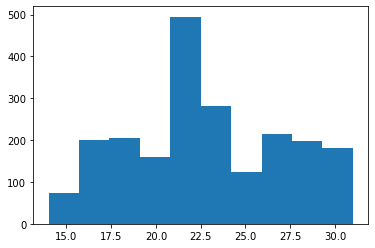

In [11]:
# take a quick look at the score distribution
plt.hist(df['n_student'])

In [12]:
# select columns that are only numbers
df_temp = df.select_dtypes('number')

df_temp

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,2,0,1,20.0,0,0,62.0,72.0
1,2,0,1,20.0,0,0,66.0,79.0
2,2,0,1,20.0,1,0,64.0,76.0
3,2,0,1,20.0,0,0,61.0,77.0
4,2,0,1,20.0,1,0,64.0,76.0
...,...,...,...,...,...,...,...,...
2128,2,1,1,30.0,0,0,39.0,55.0
2129,2,1,1,30.0,0,1,38.0,46.0
2130,2,1,1,30.0,0,1,45.0,51.0
2131,2,1,1,30.0,1,1,46.0,53.0


### Setting the baseline

(array([  4.,  30., 161., 416., 554., 489., 298., 149.,  27.,   5.]),
 array([-2.,  1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28.]),
 <BarContainer object of 10 artists>)

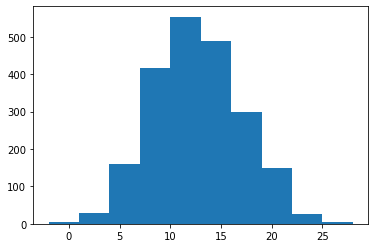

In [13]:
# see the distribution of the difference in scores between pretest and posttest
plt.hist(df_temp['posttest'] - df_temp['pretest'])

In [16]:
(df_temp['posttest'] - df_temp['pretest']).mean()

12.146272855133615

4.339009589688559


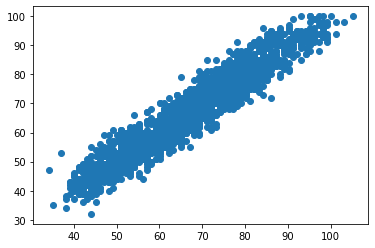

In [17]:
print(np.sqrt(mean_squared_error(df_temp['pretest'] + 12, df_temp['posttest'])))
plt.scatter(df_temp['pretest'] + 12.14, df_temp['posttest'])

### Model training

In [18]:
# X = df_temp.drop(['pretest', 'posttest'], axis=1)
X = df_temp.drop(['posttest'], axis=1)
y = df_temp['posttest']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
(df_temp['posttest'] - df_temp['pretest']).mean()

12.146272855133615

4.531957820432872


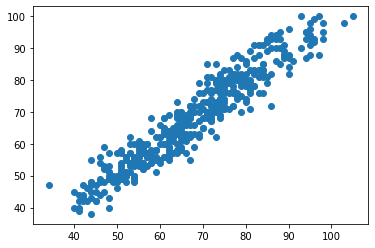

In [21]:
print(np.sqrt(mean_squared_error(y_test, X_test['pretest'] + 12)))
plt.scatter(X_test['pretest'] + 12, y_test)

3.5364276228805793


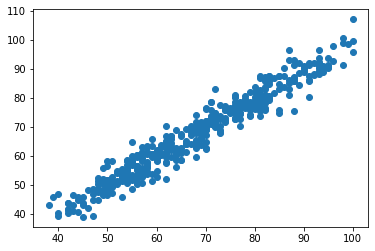

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, lr_pred)))

plt.scatter(y_test, lr_pred)

4.286508253283141


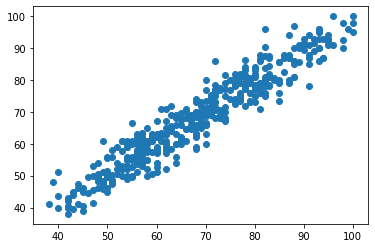

In [23]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, tree_pred)))

plt.scatter(y_test, tree_pred)

3.5917801160305984


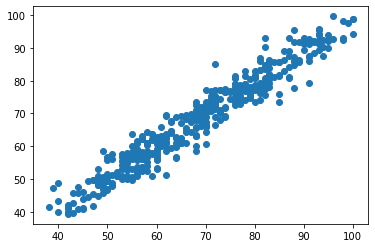

In [24]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, forest_pred)))

plt.scatter(y_test, forest_pred)

In [25]:
# prediction of the first row of X_test
forest_pred[0]

85.02428174603176

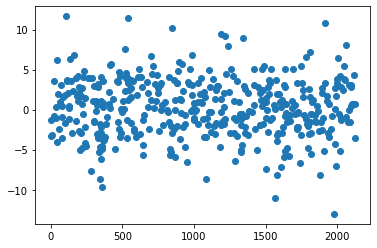

In [26]:
# check the residuals
plt.scatter(y_test.index, y_test - forest_pred)

### Exporting the model as a .joblib file

In [27]:
# dump the model as a .joblib file
dump(forest, 'forest_v1.joblib')

['forest_v1.joblib']

In [28]:
# reload the .joblib file
loaded_forest = load('forest_v1.joblib')
loaded_forest

RandomForestRegressor()

In [29]:
# take a quick look at the test dataframe
X_test

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest
1976,1,1,1,22.0,0,0,74.0
154,2,0,1,19.0,1,0,54.0
979,2,0,1,25.0,1,0,44.0
1115,0,1,1,21.0,0,0,59.0
287,2,1,1,28.0,1,1,49.0
...,...,...,...,...,...,...,...
1302,2,1,1,22.0,0,0,49.0
541,1,1,0,27.0,0,1,60.0
1293,2,1,1,22.0,0,0,50.0
1520,1,1,0,19.0,0,0,75.0


In [30]:
# get a random row
X_test.iloc[[0]]

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest
1976,1,1,1,22.0,0,0,74.0


In [31]:
# get the corresponding y test data
y_test.iloc[0]

72.0

In [32]:
# try the loaded model
loaded_forest.predict(X_test.iloc[[0]])

array([85.02428175])